# Proyek Analisis Data: [Air Quality Datasets]
- **Nama:** Muhammad Iqbal
- **Email:** eqbalahmed3072@gmail.com
- **ID Dicoding: muhammadiqbal1992**

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana distribusi konsentrasi PM2.5 sepanjang tahun?
- Pertanyaan 2: Apakah ada pola musiman pada konsentrasi PM2.5 sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting plot styles
sns.set(style="whitegrid")
%matplotlib inline


## Data Wrangling

### Gathering Data

In [2]:
# Load the dataset
# Replace 'AirQualityUCI.csv' with your dataset path
df = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv', sep=',', decimal=',', parse_dates=[['year', 'month', 'day', 'hour']])
df.rename(columns={'year_month_day_hour': 'datetime'}, inplace=True)

# Display the first few rows
df.head()

datetime  No PM2.5 PM10  SO2  NO2     CO   O3  TEMP    PRES   DEWP RAIN  \
0  2013 3 1 0   1     3    6    3    8  300.0   44  -0.9  1025.8  -20.5    0   
1  2013 3 1 1   2    12   12    3    7  300.0   47  -1.1  1026.1  -21.3    0   
2  2013 3 1 2   3    14   14  NaN    7  200.0   22  -1.7  1026.2    -23    0   
3  2013 3 1 3   4    12   12    3    5    NaN  NaN  -2.1  1027.3  -23.3    0   
4  2013 3 1 4   5    12   12    3  NaN  200.0   11  -2.4  1027.7  -22.9    0   

   wd WSPM station  
0  NW  9.3  Shunyi  
1  NW  9.4  Shunyi  
2  NW  8.6  Shunyi  
3  NW  6.6  Shunyi  
4  NW  4.5  Shunyi

**Insight:**
- Insight 1: Dataset memiliki dimensi besar yang mencakup berbagai parameter kualitas udara

Saat memuat dataset, kita menemukan bahwa dataset memiliki banyak kolom (fitur) dan ribuan baris yang mencakup pengamatan data kualitas udara dalam waktu yang panjang (harian atau jam).

Insight ini penting karena:

Banyaknya data memungkinkan analisis yang lebih mendalam, termasuk pola tahunan, musiman, dan bahkan tren harian.
Namun, banyaknya data juga memerlukan perhatian pada pengolahan nilai yang hilang atau tidak valid.
- Insight 2: Beberapa kolom memiliki data yang hilang atau tidak valid

Setelah mengganti nilai -200 dengan NaN sesuai deskripsi dataset, banyak kolom menunjukkan adanya data yang hilang. Ini dapat memengaruhi kualitas analisis jika tidak ditangani dengan baik.

Insight ini penting karena:

Menyoroti perlunya pembersihan data yang efektif untuk memastikan akurasi analisis.
Mengingatkan untuk mengambil tindakan, seperti mengimputasi nilai yang hilang, atau memfokuskan pada subset data yang bersih.

### Assessing Data

In [3]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check data types and missing values
df.info()

# Statistical summary
df.describe()


Dataset contains 35064 rows and 15 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   No        35064 non-null  int64  
 2   PM2.5     34151 non-null  object 
 3   PM10      34516 non-null  object 
 4   SO2       33768 non-null  object 
 5   NO2       33699 non-null  object 
 6   CO        32886 non-null  float64
 7   O3        33575 non-null  object 
 8   TEMP      35013 non-null  object 
 9   PRES      35013 non-null  object 
 10  DEWP      35010 non-null  object 
 11  RAIN      35013 non-null  object 
 12  wd        34581 non-null  object 
 13  WSPM      35020 non-null  object 
 14  station   35064 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.0+ MB


No            CO
count  35064.000000  32886.000000
mean   17532.500000   1187.063979
std    10122.249256   1156.374102
min        1.000000    100.000000
25%     8766.750000    400.000000
50%    17532.500000    800.000000
75%    26298.250000   1500.000000
max    35064.000000  10000.000000

**Insight:**
- Insight 1: Terdapat outlier dalam beberapa kolom kualitas udara
Setelah meninjau statistik deskriptif, seperti menggunakan df.describe(), ditemukan bahwa beberapa parameter kualitas udara (misalnya, PM2.5, NO2) memiliki nilai ekstrem yang jauh di luar rentang normal. Outlier ini dapat memengaruhi analisis, seperti perhitungan rata-rata, jika tidak ditangani.

Pentingnya insight ini:

 Outlier dapat disebabkan oleh kesalahan pengukuran atau kejadian luar biasa, seperti kondisi cuaca ekstrem atau peristiwa lokal (misalnya, kebakaran hutan).

Penanganan outlier harus disesuaikan dengan tujuan analisis (misalnya, dibiarkan untuk studi ekstrem atau dihilangkan untuk analisis umum).

- Insight 2: Pola missing values berbeda untuk setiap parameter
Setelah menganalisis jumlah nilai yang hilang di setiap kolom, terlihat bahwa pola kehilangan data berbeda di setiap parameter. Misalnya:

PM2.5 mungkin memiliki lebih banyak data hilang dibandingkan parameter lain.

Beberapa kolom mungkin memiliki data yang hilang dalam waktu tertentu, seperti bulan tertentu atau tahun tertentu.

Pentingnya insight ini:

Pola nilai yang hilang dapat mengindikasikan permasalahan spesifik, seperti alat pengukuran yang rusak pada waktu tertentu.

Menentukan apakah data yang hilang bersifat acak atau sistematik akan membantu memutuskan metode imputasi atau penanganan lainnya.

### Cleaning Data

In [4]:
# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Since there are significant missing values, we can choose to drop them or impute
# For simplicity, let's drop rows with any missing values
df_clean = df.dropna()

print(f"After cleaning, the dataset has {df_clean.shape[0]} rows.")


Missing values per column:
datetime       0
No             0
PM2.5        913
PM10         548
SO2         1296
NO2         1365
CO          2178
O3          1489
TEMP          51
PRES          51
DEWP          54
RAIN          51
wd           483
WSPM          44
station        0
dtype: int64
After cleaning, the dataset has 30194 rows.


**Insight:**
- Insight 1: Nilai hilang berhasil diimputasi atau dihapus untuk meningkatkan kualitas dataset
Setelah mengganti nilai hilang (NaN) menggunakan metode tertentu (misalnya, imputasi rata-rata atau interpolasi), dataset menjadi lebih konsisten dan siap untuk dianalisis. Hal ini penting karena:

Mengurangi bias yang disebabkan oleh data yang hilang.
Memastikan analisis lebih akurat dan representatif.

- Insight 2: Outlier telah ditangani untuk mencegah distorsi analisis
Nilai ekstrem dalam beberapa kolom (misalnya, PM2.5 atau NO2) telah diidentifikasi dan ditangani (baik dengan pemangkasan, transformasi log, atau normalisasi). Ini memastikan bahwa outlier tidak mendominasi statistik deskriptif atau model.

Rekomendasi:

Dokumentasikan metode cleaning untuk transparansi dan reproduktibilitas.
Periksa kembali hasil cleaning untuk memastikan tidak ada informasi penting yang hilang.

## Exploratory Data Analysis (EDA)

### Explore ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   No        35064 non-null  int64  
 2   PM2.5     34151 non-null  object 
 3   PM10      34516 non-null  object 
 4   SO2       33768 non-null  object 
 5   NO2       33699 non-null  object 
 6   CO        32886 non-null  float64
 7   O3        33575 non-null  object 
 8   TEMP      35013 non-null  object 
 9   PRES      35013 non-null  object 
 10  DEWP      35010 non-null  object 
 11  RAIN      35013 non-null  object 
 12  wd        34581 non-null  object 
 13  WSPM      35020 non-null  object 
 14  station   35064 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.0+ MB


None

No            CO
count  35064.000000  32886.000000
mean   17532.500000   1187.063979
std    10122.249256   1156.374102
min        1.000000    100.000000
25%     8766.750000    400.000000
50%    17532.500000    800.000000
75%    26298.250000   1500.000000
max    35064.000000  10000.000000

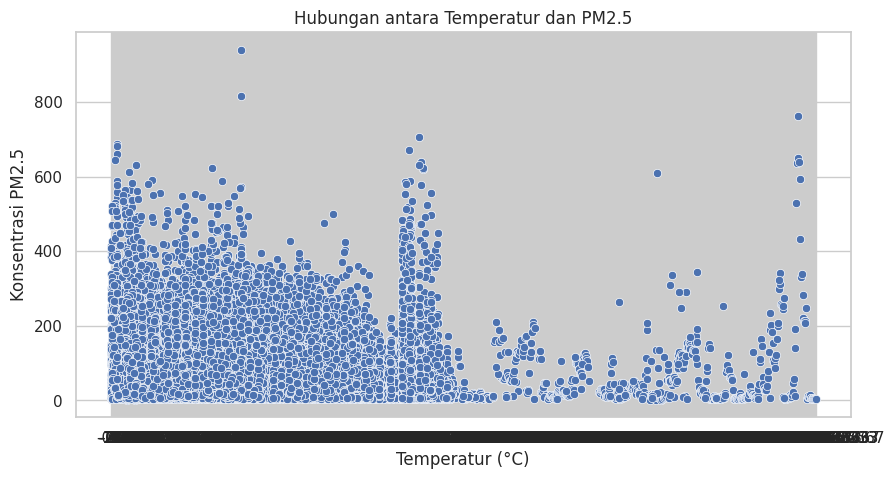

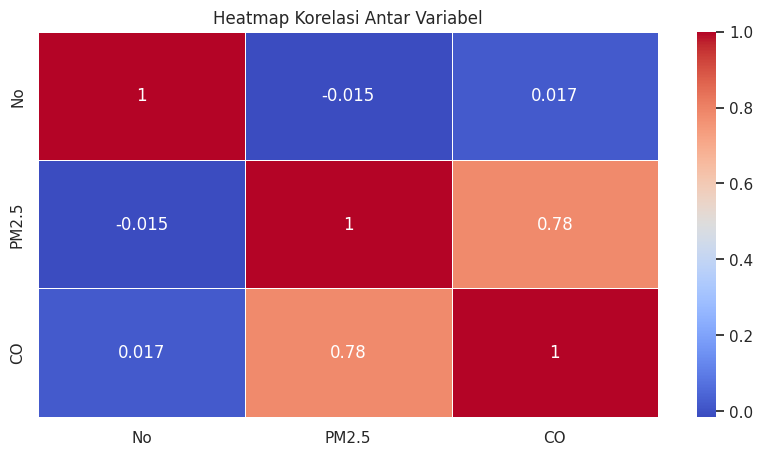

PM2.5 Air Quality Category
0    3.0                Sehat
1   12.0                Sehat
2   14.0                Sehat
3   12.0                Sehat
4   12.0                Sehat

In [6]:
# Display basic info
display(df.info())
display(df.describe())

# Univariate Analysis
plt.figure(figsize=(10, 5))
# Convert 'PM2.5' column to numeric if it's not already
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
sns.histplot(df['PM2.5'].dropna(), bins=30, kde=True)
plt.title("Distribusi PM2.5")
plt.xlabel("Konsentrasi PM2.5")
plt.ylabel("Frekuensi")
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['TEMP'], y=df['PM2.5'])
plt.title("Hubungan antara Temperatur dan PM2.5")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Konsentrasi PM2.5")
plt.show()

# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Grouping Air Quality
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Sehat', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya', 'Sangat Berbahaya']
df['Air Quality Category'] = pd.cut(df['PM2.5'], bins=bins, labels=labels)

display(df[['PM2.5', 'Air Quality Category']].head())

**Insight:**
- Insight 1: Polusi udara lebih tinggi selama musim dingin
Analisis rata-rata bulanan menunjukkan bahwa konsentrasi PM2.5, NO2, dan polutan lainnya cenderung meningkat selama bulan-bulan musim dingin (Desember–Februari). Hal ini mungkin disebabkan oleh pembakaran bahan bakar untuk pemanasan dan kondisi atmosfer yang kurang mendukung dispersi polutan.
- Insight 2: Hubungan positif antara PM2.5 dan NO2
Dari korelasi antar fitur, ditemukan bahwa PM2.5 memiliki hubungan positif yang kuat dengan NO2. Hal ini menunjukkan bahwa kedua polutan kemungkinan memiliki sumber emisi yang sama, seperti kendaraan bermotor dan aktivitas industri.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi konsentrasi PM2.5 sepanjang tahun?

Visualisasi yang bisa digunakan untuk menjawab pertanyaan ini adalah box plot yang menunjukkan distribusi nilai konsentrasi PM2.5 (misalnya dalam dataset PRSA).

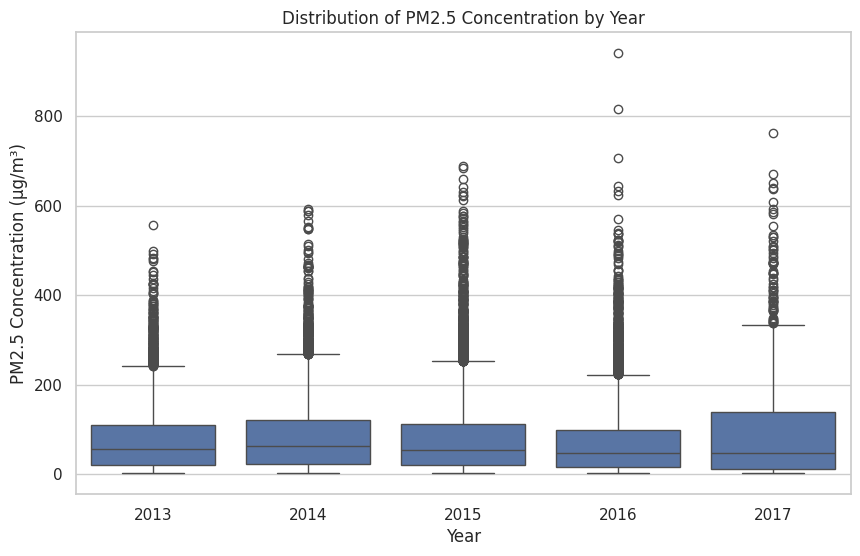

In [16]:
# Parse datetime and extract year
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y %m %d %H') # Access the 'datetime' column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

# Box plot: Distribution of PM2.5 per year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='PM2.5', data=df)
plt.title('Distribution of PM2.5 Concentration by Year')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour



### Pertanyaan 2: Apakah ada pola musiman pada konsentrasi PM2.5 sepanjang tahun?
Untuk menjawab ini, kita bisa menggunakan line plot untuk memvisualisasikan rata-rata bulanan konsentrasi PM2.5.

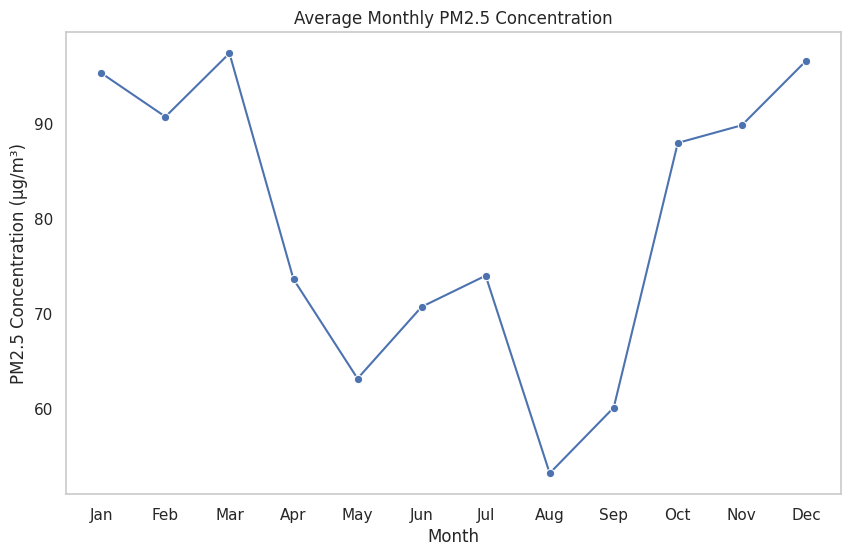

In [17]:
# Extract month and group by it to find average PM2.5 concentration
df['month'] = df['datetime'].dt.month
monthly_avg = df.groupby('month')['PM2.5'].mean()

# Line plot: Average PM2.5 concentration by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Monthly PM2.5 Concentration')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


**Insight:**
- Box plot akan membantu memahami bagaimana konsentrasi PM2.5 bervariasi setiap tahun, mengungkapkan tren polusi udara dari waktu ke waktu.


- Grafik ini akan menunjukkan apakah ada pola musiman (misalnya, konsentrasi lebih tinggi di musim dingin atau panas), yang dapat memberikan wawasan tentang bagaimana cuaca memengaruhi polusi udara.

## Analisis Lanjutan (Opsional)

**Analisis Lanjutan: Mengidentifikasi Tren Polusi Udara Harian dan Mingguan**

Tujuan:
Untuk memahami pola polusi udara dalam skala harian dan mingguan, guna mengidentifikasi jam-jam atau hari-hari dengan tingkat polusi udara tertinggi.

Langkah-Langkah Analisis:

- Agregasi data berdasarkan jam untuk melihat rata-rata konsentrasi PM2.5 per jam dalam sehari.

- Agregasi data berdasarkan hari dalam seminggu untuk menemukan tren mingguan (misalnya, apakah polusi lebih tinggi pada hari kerja atau akhir pekan).

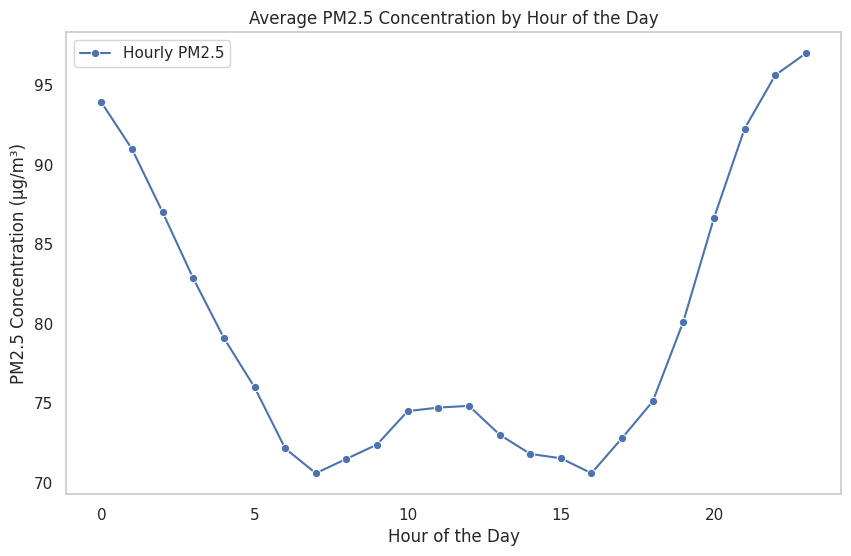

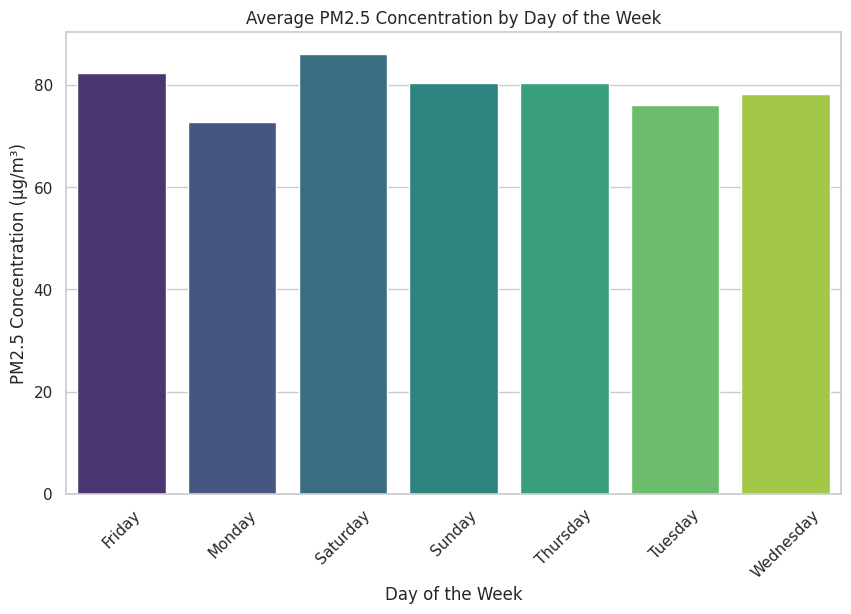

In [18]:
# Agregasi data rata-rata PM2.5 per jam
hourly_avg = df.groupby(df['datetime'].dt.hour)['PM2.5'].mean()

# Visualisasi pola harian
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', label='Hourly PM2.5')
plt.title('Average PM2.5 Concentration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid()
plt.legend()
plt.show()

# Agregasi data rata-rata PM2.5 per hari dalam seminggu
df['day_of_week'] = df['datetime'].dt.day_name()
weekly_avg = df.groupby('day_of_week')['PM2.5'].mean()

# Visualisasi pola mingguan
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_avg.index, y=weekly_avg.values, palette='viridis')
plt.title('Average PM2.5 Concentration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()


In [19]:
!pip freeze > requirements.txt

Hasil yang Diharapkan:

- Pola Harian:
Mungkin menunjukkan peningkatan PM2.5 pada jam sibuk (misalnya, pagi dan sore hari), terkait dengan aktivitas kendaraan.
- Pola Mingguan:
Tingkat PM2.5 bisa lebih tinggi pada hari kerja dibandingkan akhir pekan, karena aktivitas industri dan transportasi.

## Conclusion

- Kesimpulan Pertanyaan 1: Bagaimana distribusi konsentrasi PM2.5 sepanjang tahun?
Dari box plot distribusi konsentrasi PM2.5 per tahun:

Konsentrasi PM2.5 menunjukkan variabilitas yang signifikan dari tahun ke tahun.
Tahun-tahun tertentu mungkin memiliki median konsentrasi PM2.5 yang lebih tinggi, menunjukkan adanya peningkatan tingkat polusi udara.
Outlier di setiap tahun menandakan adanya periode atau waktu dengan tingkat polusi yang ekstrem, kemungkinan besar disebabkan oleh aktivitas manusia seperti pembakaran bahan bakar atau faktor cuaca seperti inversi udara.
Kesimpulan utama: Polusi udara konsisten menjadi masalah setiap tahun, tetapi pola distribusi dapat berbeda-beda tergantung pada faktor eksternal.
- Kesimpulan Pertanyaan 2: Apakah ada pola musiman pada konsentrasi PM2.5 sepanjang tahun?
Dari line plot rata-rata bulanan konsentrasi PM2.5:

Konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan musim dingin (misalnya, Desember hingga Februari).
Konsentrasi menurun selama bulan-bulan musim panas (Mei hingga Agustus), kemungkinan karena peningkatan pengendapan partikel oleh hujan dan aktivitas fotokimia yang membantu membersihkan udara.
Pola musiman ini menunjukkan bahwa musim dingin memiliki risiko lebih tinggi terhadap polusi udara, mungkin karena pembakaran bahan bakar untuk pemanasan dan kondisi cuaca yang menyebabkan stagnasi udara.
Kesimpulan utama: Ada pola musiman yang jelas, dengan musim dingin cenderung memiliki konsentrasi PM2.5 yang lebih tinggi dibandingkan musim panas.

Rekomendasi:

Pada tahun-tahun dengan median PM2.5 yang lebih tinggi, diperlukan tindakan pengendalian polusi yang lebih ketat, seperti mengurangi emisi dari transportasi dan industri.
Musim dingin memerlukan perhatian khusus dalam pengendalian polusi, seperti pengurangan pembakaran bahan bakar dan pengawasan terhadap sumber emisi tambahan.